AMIYT

# Problem Statement

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

# Import libraries

In [ ]:
# for numerical operations
import numpy as np
import pandas as pd

# for graphical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

First read the dataset and get information from it.


In [ ]:
# Read the CSV data
dataset = pd.read_csv("/Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Exploration

Exploring the descriptive statistics of the variables.

In [ ]:
# no. of rows and columns in dataset
print("Rows:", dataset.shape[0])
print("Columns:", dataset.shape[1])

Rows: 200
Columns: 5


In [ ]:
# overall information of the dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Mathematical perspective in dataset
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data Preprocessing

It refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis.

# Check for any missing value in data set and treat it

In [ ]:
dataset.isnull().sum() # or df1.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64



# Check for duplicates

In [ ]:
dataset.duplicated().sum()

0

# Drop/Remove unnecessary columns

In [ ]:
df1 = dataset.drop(labels=["Unnamed: 0"], axis=1)

df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis (EDA)

In [ ]:
# final total columns name
df1.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Check the relationship between two variables

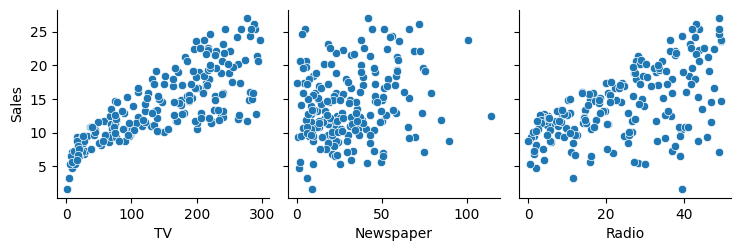

In [ ]:
#Data Visualization
sns.pairplot(df1, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', kind='scatter')
plt.show()

Training & Testing
# Splitting the data into attributes(X) and target variable(Y)

In [ ]:
feature=['TV', 'Radio', 'Newspaper']
X = df1[feature]
Y = df1['Sales']

In [ ]:
X.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [ ]:
Y.head(3)

0    22.1
1    10.4
2     9.3
Name: Sales, dtype: float64

# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=20)

In [ ]:
X_train.head()

,TV,Radio,Newspaper
152,197.6,23.3,14.2
67,139.3,14.5,10.2
133,219.8,33.5,45.1
59,210.7,29.5,9.3
63,102.7,29.6,8.4


In [ ]:
# Standardized X_train and X-test with the help of StandardScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Linear Regression
It assumes a linear relationship between the variables, meaning that the dependent variable can be expressed as a linear combination of the independent variables, adjusted by an error term.
# The equation for a simple linear regression model with one independent variable can be represented as: y = β₀ + β₁x + ɛ

In [ ]:
from sklearn.linear_model import LinearRegression

# creating a Linear regression object
lr = LinearRegression()

# Model Training
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:

# Accuracy on testing dataset
print("Accuracy of Linear Regression Model:", "{:.3f}".format(lr.score(X_test, Y_test)))



Accuracy of Linear Regression Model: 0.883
